In [443]:
import os
import re
import random
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, make_scorer
from scripts.data_cleaning import clean_data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
# from sklearn.
import itertools
from collections import Counter

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [449]:



# Load your data
file_path = './train_cleaned.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('prod_taken', axis=1)
y = data['prod_taken']

CAT_COL  = X.select_dtypes(include=['object', 'category']).columns
NUM_COL = [col for col in X.columns if col not in CAT_COL]
CONT_COL = ["age", "duration_of_pitch", "monthly_income"]

X[NUM_COL] = X[NUM_COL].fillna(X[NUM_COL].median())
for col in NUM_COL:
    if col not in CONT_COL:
        X[col] = X[col].astype('int')
X[CAT_COL] = X[CAT_COL].fillna("unknown")

cat_cols = []
for col in X.columns:
    if X[col].dtype == 'object': #or 'category' if that's the case
        cat_cols.append(True)
    else:
        cat_cols.append(False)
# Preprocessing for categorical variables (if necessary)
X = pd.get_dummies(X)

# Stratified K-Fold Cross Validation


# Define the SMOTE and the classifier pipeline
model = RandomForestClassifier(random_state=42)
smote = SMOTE(random_state=42)



In [450]:
# X[NUM_COL]

In [451]:
# X[CAT_COL].nunique()

In [452]:
# y_train

In [464]:
pipeline = Pipeline( [('model', model)])
scores = []
# Lists to store results
skf = StratifiedKFold(n_splits=5, random_state=1972, shuffle=True)
fold = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # resample
    print(np.sum(y_train), y_train.shape)

    
    nearmiss = NearMiss(sampling_strategy='non majority')
    X_train, y_train = nearmiss.fit_resample(X_train, y_train)
    print(np.sum(y_train))
    
#     X_train = pd.get_dummies(X_train)
#     X_test = pd.get_dummies(X_test)
    print(np.sum(y_train), y_train.shape)
     # Fit the model
    pipeline.fit(X_train, y_train)
    # Predict and evaluate
    

    

    y_pred = pipeline.predict(X_test)
    # Print the results
    print(f"Fold {fold}:")
    print(confusion_matrix(y_test, y_pred))
#     print(classification_report(y_test, y_pred))
    print("="*60)
    
    fold += 1
#     break
# Cross-Validation Score (average across folds)
cv_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='roc_auc')
print(cv_scores)
print(f"Average roc_auc-Score across folds: {cv_scores.mean(), cv_scores.std()}")

397 (2791,)


ValueError: When 'sampling_strategy' is a string, it needs to be one of {'minority': <function _sampling_strategy_minority at 0x7fb65c825268>, 'majority': <function _sampling_strategy_majority at 0x7fb65c8250d0>, 'not minority': <function _sampling_strategy_not_minority at 0x7fb65c8251e0>, 'not majority': <function _sampling_strategy_not_majority at 0x7fb65c825158>, 'all': <function _sampling_strategy_all at 0x7fb65c825048>, 'auto': <function _sampling_strategy_auto at 0x7fb65c8252f0>}. Got 'non majority' instead.

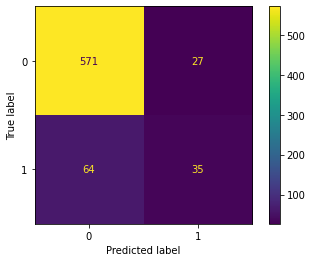

In [364]:
cm = confusion_matrix(y_test, y_pred, labels=pipeline[0].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipeline[0].classes_)
disp.plot()
plt.show()

In [368]:
df = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['prod_taken'] == 1]
non_fraud_df = df.loc[df['prod_taken'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,age,typeof_contact,city_tier,duration_of_pitch,occupation,gender,number_of_person_visiting,number_of_followups,product_pitched,preferred_property_star,number_of_trips,passport,pitch_satisfaction_score,designation,monthly_income,prod_taken,marital_status,car_ownership,children
1060,34.0,Company Invited,2,540.0,Salaried,male,1.0,3.0,deluxe,3.0,2.0,0,1,manager,259305.0,1,Divorced,Car Ownership,No Children
1101,NaN,Company Invited,2,1140.0,Small Business,male,1.0,4.0,basic,3.0,2.0,0,3,executive,259155.0,1,Single,Car Ownership,No Children
3030,26.0,Company Invited,2,900.0,Large Business,male,2.0,5.0,basic,5.0,7.0,1,2,executive,268050.0,0,Single,No Car Ownership,1 Children
1563,49.0,Self Enquiry,2,540.0,Large Business,male,2.0,5.0,super deluxe,3.0,1.0,0,3,avp,428580.0,1,Unmarried,Car Ownership,1 Children
1405,54.0,Company Invited,3,960.0,Small Business,female,2.0,3.0,standard,3.0,4.0,1,4,senior manager,319845.0,1,Married,Car Ownership,1 Children


In [369]:
new_df["prod_taken"].value_counts()

1    497
0    492
Name: prod_taken, dtype: int64

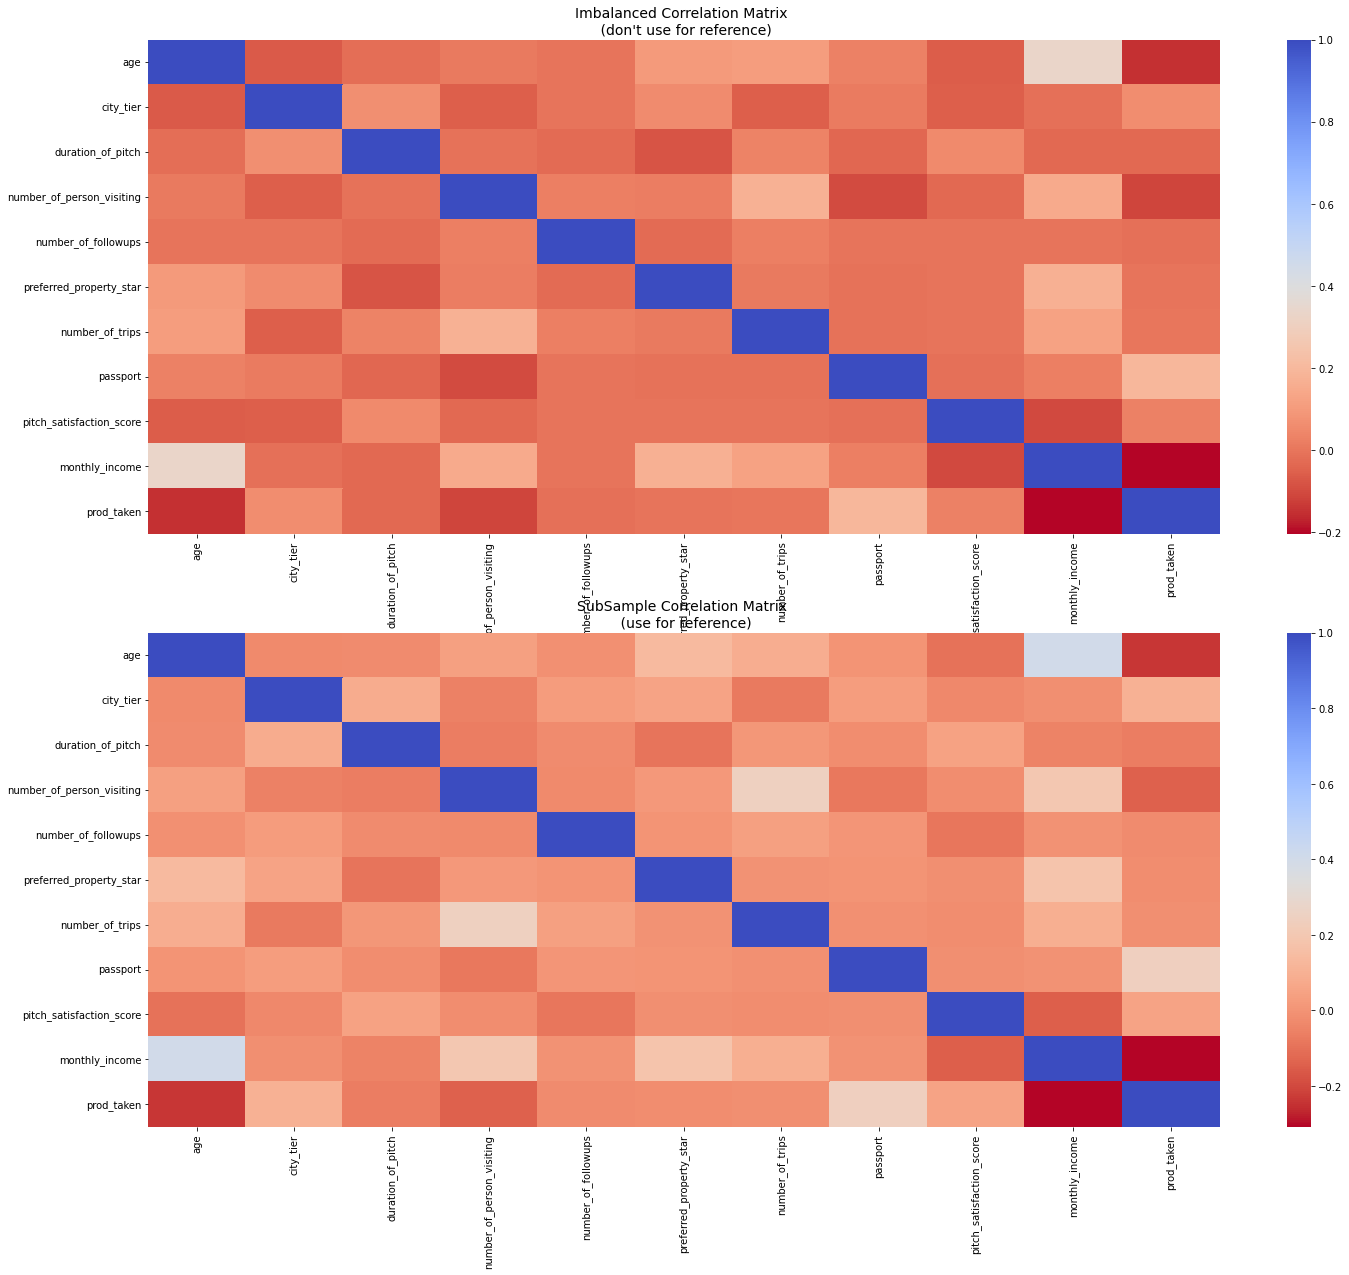

In [370]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

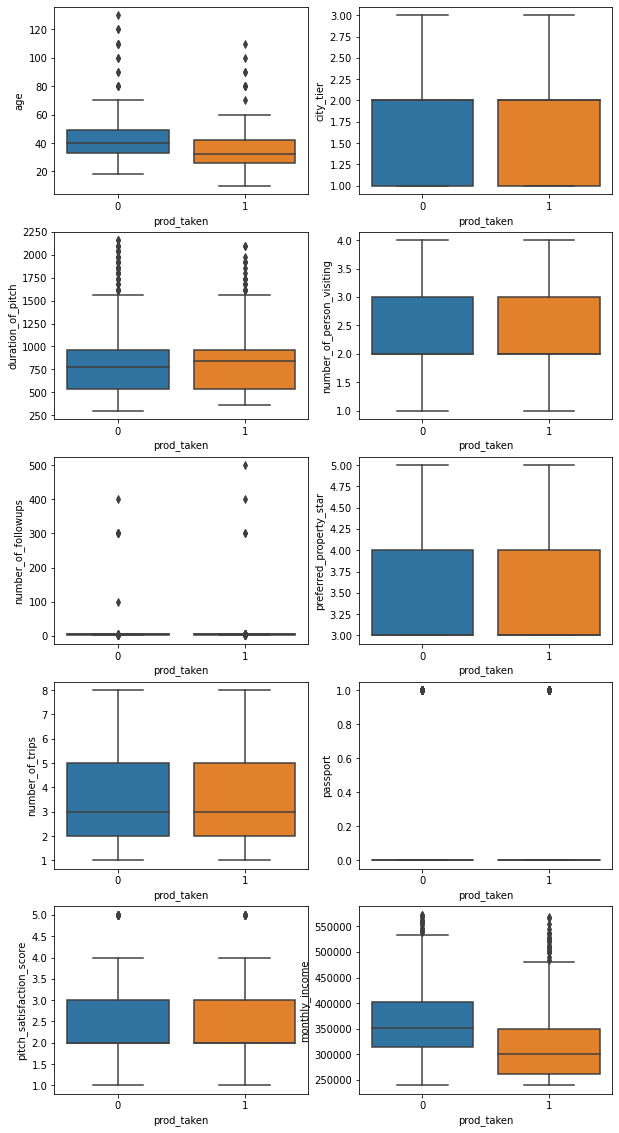

In [371]:
f, axes = plt.subplots(len(NUM_COL)//2,2, figsize=(10,20))
for col, ax in zip(NUM_COL, axes.reshape(-1)):
#     plt.subplots()
    sns.boxplot(data= new_df, x="prod_taken", y=col, ax=ax)

In [372]:
# outlier_detection
def outlier_analysis(X_in, col):
    print("column ", col)
    X = X_in[X_in["prod_taken"]==1]
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(X[col])
    drop_index = X[(X[col] > Upper_tail) | (X[col] < Lower_tail)].index
    

    print('lower limit: {} | upper limit: {}'.format(Lower_tail, Upper_tail))
    print('iqr: {}'.format(iqr))
    print("len of outlier", len(drop_index))
    print("="*44)
    
    return X_in.drop(drop_index)
#     print(X.loc[drop_index, col])


In [373]:
new_df.shape

(989, 19)

In [374]:
for col in CONT_COL+["number_of_followups"]:
    new_df = outlier_analysis(new_df, col)


column  age
lower limit: 2.0 | upper limit: 66.0
iqr: 16.0
len of outlier 9
column  duration_of_pitch
lower limit: -90.0 | upper limit: 1590.0
iqr: 420.0
len of outlier 17
column  monthly_income
lower limit: 133224.375 | upper limit: 474669.375
iqr: 85361.25
len of outlier 26
column  number_of_followups
lower limit: 1.5 | upper limit: 5.5
iqr: 1.0
len of outlier 24


In [420]:
def impute(X):
    X = X.copy()
    X[NUM_COL] = X[NUM_COL].fillna(X[NUM_COL].median())
    for col in NUM_COL:
        if col not in CONT_COL:
            X[col] = X[col].astype('int')
    X[CAT_COL] = X[CAT_COL].fillna("unknown")
    return X

In [375]:
X = new_df


In [376]:
new_df = pd.get_dummies(new_df,columns= CAT_COL)

In [377]:
new_df

,age,city_tier,duration_of_pitch,number_of_person_visiting,number_of_followups,preferred_property_star,number_of_trips,passport,pitch_satisfaction_score,monthly_income,...,marital_status_Married,marital_status_Single,marital_status_Unmarried,car_ownership_Car Ownership,car_ownership_No Car Ownership,children_1 Children,children_2 Children,children_3 Children,children_No Children,children_unknown
1060,34.0,2,540.0,1,3,3,2,0,1,259305.0,...,0,0,0,1,0,0,0,0,1,0
1101,37.0,2,1140.0,1,4,3,2,0,3,259155.0,...,0,1,0,1,0,0,0,0,1,0
3030,26.0,2,900.0,2,5,5,7,1,2,268050.0,...,0,1,0,0,1,1,0,0,0,0
1563,49.0,2,540.0,2,5,3,1,0,3,428580.0,...,0,0,1,1,0,1,0,0,0,0
1405,54.0,3,960.0,2,3,3,4,1,4,319845.0,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,46.0,3,360.0,3,4,4,2,0,1,351885.0,...,0,1,0,1,0,0,1,0,0,0
3279,36.0,2,780.0,3,4,4,3,0,3,355410.0,...,1,0,0,1,0,1,0,0,0,0
1170,24.0,2,900.0,2,4,3,2,0,4,261255.0,...,0,0,0,0,1,1,0,0,0,0
1501,43.0,1,300.0,3,5,3,3,0,1,395955.0,...,0,0,1,1,0,0,1,0,0,0


In [378]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('prod_taken', axis=1)
y = new_df['prod_taken']

In [379]:
scaler = StandardScaler()
X[NUM_COL] = scaler.fit_transform(X[NUM_COL])

In [380]:
X

,age,city_tier,duration_of_pitch,number_of_person_visiting,number_of_followups,preferred_property_star,number_of_trips,passport,pitch_satisfaction_score,monthly_income,...,marital_status_Married,marital_status_Single,marital_status_Unmarried,car_ownership_Car Ownership,car_ownership_No Car Ownership,children_1 Children,children_2 Children,children_3 Children,children_No Children,children_unknown
1060,-0.314324,0.442018,-0.781348,-1.778579,-0.115340,-0.754587,-0.649501,-0.418368,-1.454150,-1.094968,...,0,0,0,1,0,0,0,0,1,0
1101,-0.086504,0.442018,0.794117,-1.778579,-0.078915,-0.754587,-0.649501,-0.418368,0.425028,-1.097086,...,0,1,0,1,0,0,0,0,1,0
3030,-0.921845,0.442018,0.163931,-0.398934,-0.042490,2.614302,2.075658,2.390237,-0.514561,-0.971487,...,0,1,0,0,1,1,0,0,0,0
1563,0.824778,0.442018,-0.781348,-0.398934,-0.042490,-0.754587,-1.194533,-0.418368,0.425028,1.295223,...,0,0,1,1,0,1,0,0,0,0
1405,1.204478,1.982333,0.321478,-0.398934,-0.115340,-0.754587,0.440562,2.390237,1.364616,-0.240133,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,0.596957,1.982333,-1.253988,0.980712,-0.078915,0.929858,-0.649501,-0.418368,-1.454150,0.212277,...,0,1,0,1,0,0,1,0,0,0
3279,-0.162444,0.442018,-0.151162,0.980712,-0.078915,0.929858,-0.104469,-0.418368,0.425028,0.262051,...,1,0,0,1,0,1,0,0,0,0
1170,-1.073725,0.442018,0.163931,-0.398934,-0.078915,-0.754587,-0.649501,-0.418368,1.364616,-1.067434,...,0,0,0,0,1,1,0,0,0,0
1501,0.369137,-1.098297,-1.411534,0.980712,-0.042490,-0.754587,-0.104469,-0.418368,-1.454150,0.834553,...,0,0,1,1,0,0,1,0,0,0


In [381]:
# T-SNE Implementation
import time
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 3.7 s
PCA took 0.041 s
Truncated SVD took 0.027 s


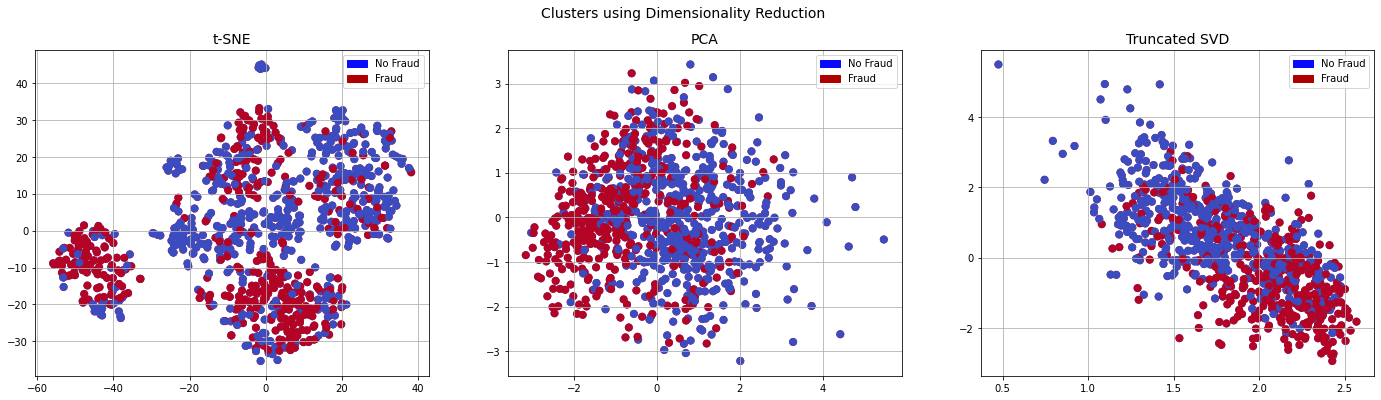

In [382]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [399]:
#3d 
n_components = 3
tsne = TSNE(n_components=n_components,  random_state=42)
embedding = tsne.fit_transform(X.values)

column_name = [f"tsne{idx+1}" for idx in range(n_components)]
embedding = pd.DataFrame(embedding, columns=column_name, index=range(len(embedding)))
embedding["target"] = y.values

In [400]:
import plotly.express as px
fig = px.scatter_3d(embedding, x='tsne1', y='tsne2', z='tsne3',
              color='target')
fig.show()

In [401]:
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Convert to a DataFrame for easier plotting
column_name = [f"pca{idx+1}" for idx in range(n_components)]

df_pca = pd.DataFrame(X_pca, columns=column_name)
df_pca['target'] = y.values

In [467]:
fig = px.scatter_3d(df_pca, x='pca1', y='pca2', z='pca3',
              color='target')
fig.show()

In [465]:
n_components =3
X_reduced_svd = TruncatedSVD(n_components=n_components, algorithm='randomized', random_state=42).fit_transform(X.values)
column_name = [f"svd{idx+1}" for idx in range(n_components)]

X_reduced_svd = pd.DataFrame(X_reduced_svd, columns=column_name)
X_reduced_svd['target'] = y.values

In [466]:
fig = px.scatter_3d(X_reduced_svd, x='svd1', y='svd2', z='svd3',
              color='target')
fig.show()

In [407]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [412]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [413]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 76.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 76.0 % accuracy score
Classifiers:  SVC Has a training score of 79.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 67.0 % accuracy score


In [415]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

/home/bulbul/Documents/competition/signate_cup_2024/.venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/bulbul/Documents/competition/signate_cup_2024/.venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [416]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  78.08%
Knears Neighbors Cross Validation Score 75.48%
Support Vector Classifier Cross Validation Score 78.77%
DecisionTree Classifier Cross Validation Score 74.11%


In [435]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

X = data.drop('prod_taken', axis=1)
y = data['prod_taken']

X = impute(X)
X = pd.get_dummies(X,columns= CAT_COL)

for train_index, test_index in sss.split(X, y):
#     print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [438]:
# We will undersample during cross validating
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

undersample_X = data.drop('prod_taken', axis=1)
undersample_y = df['prod_taken']

undersample_X = impute(undersample_X)
undersample_X = pd.get_dummies(undersample_X,columns= CAT_COL)

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
    undersample_Xtrain = undersample_Xtrain.values
    undersample_Xtest = undersample_Xtest.values
    undersample_ytrain = undersample_ytrain.values
    undersample_ytest = undersample_ytest.values 

    undersample_accuracy = []
    undersample_precision = []
    undersample_recall = []
    undersample_f1 = []
    undersample_auc = []

    # Implementing NearMiss Technique 
    # Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
    X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
    print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
    # Cross Validating the right way

    for train, test in sss.split(undersample_Xtrain, undersample_ytrain):

        undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
        undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
        undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

        undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
        undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
        undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
        undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
        undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 691  694  695 ... 3486 3487 3488] Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

Train: [   0    1    2 ... 3486 3487 3488] Test: [2061 2070 2081 2083 2084 2089 2100 2101 2102 2103 2104 2105 2106 2107
 2108 2109 2110 2111 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121
 2122 2123 2124 2125 2126 2127 2128 2129 2130 2131 2132 2133 2134 2135
 2136 2137 2138 2139 2140 2141 2142 2143 2144 2145 2146 2147 2148 2149
 2150 2151 2152 2153 2154 2155 2156 2157 2158 2159 2160 2161 2162 2163
 2164 2165 2166 2167 2168 2169 2170 2171 2172 2173 2174 2175 2176 2177
 2178 2179 2180 2181 2182 2183 2184 2185 2186 2187 2188 2189 2190 2191
 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201 2202 2203 2204 2205
 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219
 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233
 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247
 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261
 2262 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275
 2276 2277 2278 2279 2280 22

In [439]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/bulbul/Documents/competition/signate_cup_2024/.venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

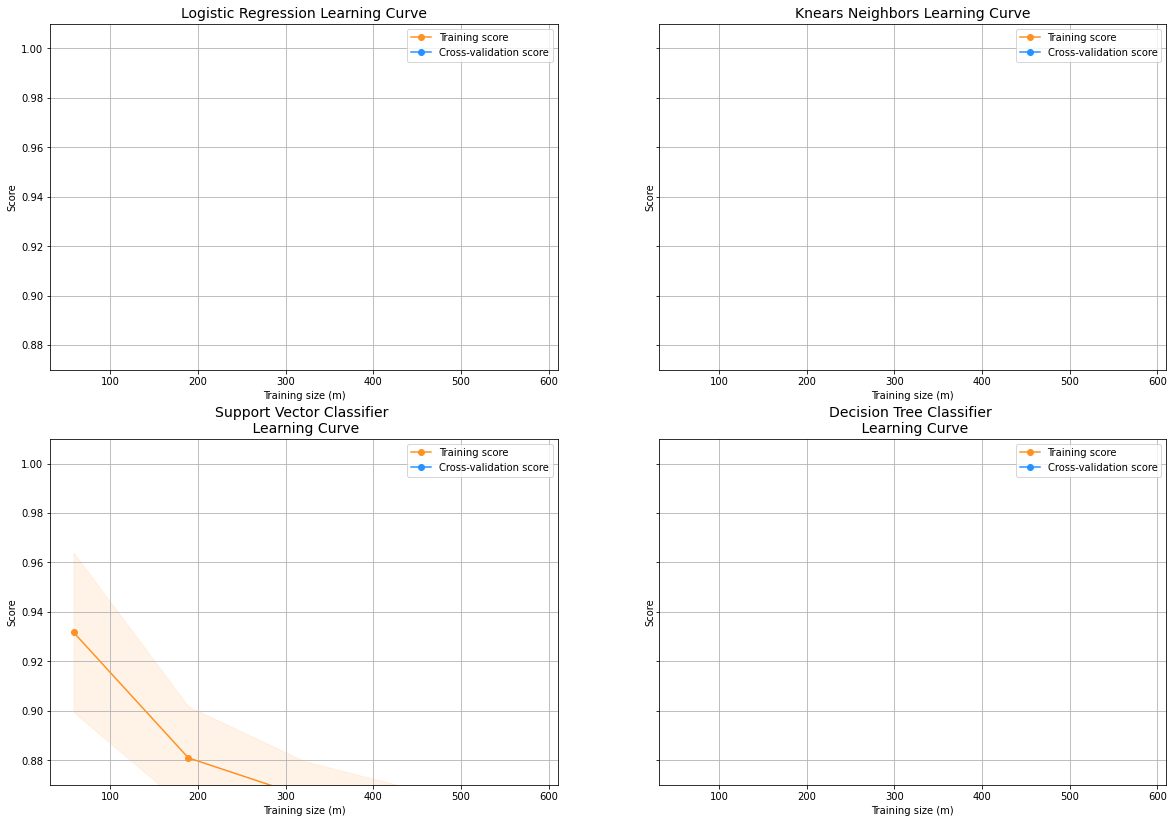

In [440]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [441]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [442]:

from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.8490979954617073
KNears Neighbors:  0.7483923738588304
Support Vector Classifier:  0.8423885592805073
Decision Tree Classifier:  0.7431379052989469
